In [4]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Path to your Excel file
file_path = '/Users/royajahanbakhsh/Documents/Code Academy/Datasets/Final Project/Energy statistical country datasheets 2024-04 for web.xlsx'  # Replace this with the actual file path

# Load all sheets from the Excel file
excel_data = pd.read_excel(file_path, sheet_name=None)  # Load all sheets into a dictionary

# Create a list to store the modified DataFrames
df_list = []

# Loop through the sheets, add 'Country' column, and append to list
for country, data in excel_data.items():
    data['Country'] = country  # Add a new 'Country' column with the sheet name (country)
    df_list.append(data)  # Add the modified DataFrame to the list

# Combine all the DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Reorder the columns to put 'Country' before 'Year' (if needed)
cols = ['Country'] + [col for col in combined_df.columns if col != 'Country']  # Ensure 'Country' is first
combined_df = combined_df[cols]

# Preview the combined DataFrame
print(combined_df.head())


     Country  Year  Production  Solid fossil fuels  \
0  EU27_2020  1990  741.704823          305.507545   
1  EU27_2020  1991  726.044770          279.517761   
2  EU27_2020  1992  713.105377          266.584992   
3  EU27_2020  1993  708.997544          250.975029   
4  EU27_2020  1994  696.703899          239.995957   

   Oil and petroleum products  Natural gas     Nuclear  \
0                   40.414990   123.067252  188.580208   
1                   39.058758   128.543796  193.463900   
2                   38.510757   126.784775  193.848066   
3                   38.417307   129.610770  199.597807   
4                   40.007048   125.163327  198.979163   

   Renewables and biofuels      Hydro      Wind  ...  \
0                70.703227  24.388936  0.066146  ...   
1                73.596523  25.418195  0.093337  ...   
2                75.392635  26.455971  0.130481  ...   
3                79.907686  27.151247  0.183784  ...   
4                80.383484  28.016521  0.27093

In [423]:
combined_df

,Country,Year,Production,Solid fossil fuels,Oil and petroleum products,Natural gas,Nuclear,Renewables and biofuels,Hydro,Wind,...,Total GHG - GDP Intensity [ton CO2 eq./M€'15],Total Population [thousands of people],GDP2015 [Mrd EUR at 2015 exchange rates],GDP-market prices [Mrd EUR at current prices],Final Consumption by Renewables and biofuels: Solar thermal,Final Consumption by Renewables and biofuels: Geothermal,Final Consumption by Renewables and biofuels: Solid biofuels and renewable waste,Final Consumption by Renewables and biofuels: Biogases,Final Consumption by Renewables and biofuels: Liquid biofuels,Final Consumption by Renewables and biofuels: Ambient heat (from heat pumps)
0,EU27_2020,1990,741.704823,305.507545,40.414990,123.067252,188.580208,70.703227,24.388936,0.066146,...,599.121327,418030.739,8215.15517,5101.09510,0.151766,0.406356,37.733227,0.265549,0.006253,0.054146
1,EU27_2020,1991,726.044770,279.517761,39.058758,128.543796,193.463900,73.596523,25.418195,0.093337,...,577.987149,419504.036,8330.95537,5387.13019,0.170276,0.406690,39.301450,0.270253,0.006947,0.053033
2,EU27_2020,1992,713.105377,266.584992,38.510757,126.784775,193.848066,75.392635,26.455971,0.130481,...,555.309946,420413.536,8405.34337,5647.46529,0.188813,0.437057,38.690296,0.210733,0.022641,0.055936
3,EU27_2020,1993,708.997544,250.975029,38.417307,129.610770,199.597807,79.907686,27.151247,0.183784,...,549.376007,421912.578,8355.30972,5760.56238,0.204031,0.429819,41.595245,0.221099,0.054063,0.060517
4,EU27_2020,1994,696.703899,239.995957,40.007048,125.163327,198.979163,80.383484,28.016521,0.270939,...,533.048208,423104.986,8574.93589,6029.49658,0.222241,0.435456,40.757922,0.231202,0.145097,0.062360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,SE,2018,36.598622,0.000000,0.000000,0.000000,16.727000,19.025523,5.349097,1.429321,...,111.865726,10120.242,486.16410,470.67310,0.010915,0.000000,5.091621,0.147607,1.635570,1.351557
920,SE,2019,37.021187,0.000000,0.000000,0.000000,16.239000,19.943121,5.620894,1.706535,...,106.647368,10230.185,495.82030,476.86950,0.010653,0.000000,5.140489,0.147105,1.564322,1.351557
921,SE,2020,34.471306,0.000000,0.000000,0.000000,12.028000,21.508212,6.224334,2.366810,...,96.767121,10327.589,485.05990,480.55640,0.010414,0.000000,5.566566,0.129789,1.656847,1.462477
922,SE,2021,35.702713,0.000000,0.000000,0.000000,12.342000,22.526675,6.352966,2.342562,...,94.627452,10379.295,514.87670,540.73400,0.010151,0.000000,5.475685,0.118062,1.753549,1.473990


In [7]:
import pandas as pd

# Dictionary to map ISO codes to full country names
country_mapping = {
    'BE': 'Belgium',
    'BG': 'Bulgaria',
    'CZ': 'Czechia',
    'DK': 'Denmark',
    'DE': 'Germany',
    'EE': 'Estonia',
    'IE': 'Ireland',
    'EL': 'Greece',
    'ES': 'Spain',
    'FR': 'France',
    'HR': 'Croatia',
    'IT': 'Italy',
    'CY': 'Cyprus',
    'LV': 'Latvia',
    'LT': 'Lithuania',
    'LU': 'Luxembourg',
    'HU': 'Hungary',
    'MT': 'Malta',
    'NL': 'Netherlands',
    'AT': 'Austria',
    'PL': 'Poland',
    'PT': 'Portugal',
    'RO': 'Romania',
    'SI': 'Slovenia',
    'SK': 'Slovakia',
    'FI': 'Finland',
    'SE': 'Sweden'
}

# Replace ISO codes with full country names in the 'Country' column
combined_df['Country'] = combined_df['Country'].replace(country_mapping)




In [8]:
list(combined_df.columns)

['Country',
 'Year',
 'Production',
 'Solid fossil fuels',
 'Oil and petroleum products',
 'Natural gas',
 'Nuclear',
 'Renewables and biofuels',
 'Hydro',
 'Wind',
 'Solar photovoltaic',
 'Solar thermal',
 'Solid biofuels',
 'Biogases',
 'Liquid biofuels',
 'Imports ',
 'Solid fossil fuels.1',
 'Oil and petroleum products.1',
 'Natural gas.1',
 'Renewables and biofuels.1',
 'Electricity',
 'Exports',
 'Solid fossil fuels.2',
 'Oil and petroleum products.2',
 'Natural gas.2',
 'Renewables and biofuels.2',
 'Electricity.1',
 'Gross inland consumption',
 'Solid fossil fuels.3',
 'Manufactured gases',
 'Peat and peat products',
 'Oil shale and oil sands',
 'Oil and petroleum products.3',
 'Natural gas.3',
 'Nuclear.1',
 'Renewables and biofuels.3',
 'Electricity.2',
 'Heat',
 'Waste, non-renewable',
 'Final energy consumption',
 'by Fuel/Product: Solid fossil fuels',
 'by Fuel/Product: Manufactured gases',
 'by Fuel/Product: Peat and peat products',
 'by Fuel/Product: Oil shale and oil sa

In [137]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [9]:
combined_df['Country'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 924 entries, 0 to 923
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
924 non-null    object
dtypes: object(1)
memory usage: 7.3+ KB


In [10]:
print(combined_df.iloc[:, :104].dtypes)


Country                                                                              object
Year                                                                                  int64
Production                                                                          float64
Solid fossil fuels                                                                  float64
Oil and petroleum products                                                          float64
                                                                                     ...   
Final Consumption by Renewables and biofuels: Geothermal                            float64
Final Consumption by Renewables and biofuels: Solid biofuels and renewable waste    float64
Final Consumption by Renewables and biofuels: Biogases                              float64
Final Consumption by Renewables and biofuels: Liquid biofuels                       float64
Final Consumption by Renewables and biofuels: Ambient heat (from heat pumps)    

In [11]:
print(combined_df.isnull().sum())


Country                                                                             0
Year                                                                                0
Production                                                                          0
Solid fossil fuels                                                                  0
Oil and petroleum products                                                          0
                                                                                   ..
Final Consumption by Renewables and biofuels: Geothermal                            0
Final Consumption by Renewables and biofuels: Solid biofuels and renewable waste    0
Final Consumption by Renewables and biofuels: Biogases                              0
Final Consumption by Renewables and biofuels: Liquid biofuels                       0
Final Consumption by Renewables and biofuels: Ambient heat (from heat pumps)        0
Length: 104, dtype: int64


In [12]:
combined_df['Overall Renewable share (with aviation cap) [%]'].isnull().sum()

392

In [13]:
columns_to_check = ['Overall Renewable share (with aviation cap) [%]', 
                    'RES-E - Renewable Electricity Generation [%]', 
                    'RES-H&C - Renewable Heating and Cooling [%]']

null_values = combined_df[columns_to_check].isnull().sum()
print(null_values)


Overall Renewable share (with aviation cap) [%]    392
RES-E - Renewable Electricity Generation [%]       392
RES-H&C - Renewable Heating and Cooling [%]        392
dtype: int64


In [14]:
combined_df[columns_to_check] = combined_df[columns_to_check].fillna(0)

print(combined_df[columns_to_check].isnull().sum())

Overall Renewable share (with aviation cap) [%]    0
RES-E - Renewable Electricity Generation [%]       0
RES-H&C - Renewable Heating and Cooling [%]        0
dtype: int64


In [15]:
combined_df.columns = combined_df.columns.str.strip()

In [16]:
combined_df.fillna(0.0, inplace=True)


In [18]:
# Create a dictionary for renaming columns with more descriptive names
renaming_dict = {
    # Solid fossil fuels
    'Solid fossil fuels': 'Production Solid fossil fuels',
    'Solid fossil fuels.1': 'Imports Solid fossil fuels',
    'Solid fossil fuels.2': 'Exports Solid fossil fuels',
    'Solid fossil fuels.3': 'Consumption Solid fossil fuels',

    # Oil and petroleum products
    'Oil and petroleum products': 'Production Oil and petroleum products',
    'Oil and petroleum products.1': 'Imports Oil and petroleum products',
    'Oil and petroleum products.2': 'Exports Oil and petroleum products',
    'Oil and petroleum products.3': 'Consumption Oil and petroleum products',

    # Natural gas
    'Natural gas': 'Production Natural gas',
    'Natural gas.1': 'Imports Natural gas',
    'Natural gas.2': 'Exports Natural gas',
    'Natural gas.3': 'Consumption Natural gas',

    # Renewables and biofuels
    'Renewables and biofuels': 'Production Renewables and biofuels',
    'Renewables and biofuels.1': 'Imports Renewables and biofuels',
    'Renewables and biofuels.2': 'Exports Renewables and biofuels',
    'Renewables and biofuels.3': 'Consumption Renewables and biofuels',

    # Electricity
    'Electricity': 'Imports Electricity',
    'Electricity.1': 'Exports Electricity',
    'Electricity.2': 'Consumption Electricity',

    # Nuclear energy
    'Nuclear': 'Production Nuclear',
    'Nuclear.1': 'Consumption Nuclear',
    'Nuclear.2': 'Installed Capacity Nuclear',

    # Hydro energy
    'Hydro': 'Production Hydro',
    'Hydro.1': 'Installed Capacity Hydro',

    # Wind energy
    'Wind': 'Production Wind',
    'Wind.1': 'Installed Capacity Wind',

    # Solar photovoltaic (PV)
    'Solar photovoltaic': 'Production Solar photovoltaic',
    'Solar PV': 'Installed Capacity Solar PV',

    # Other renewables
    'Solar thermal': 'Production Solar thermal',
    'Solid biofuels': 'Production Solid biofuels',
    'Biogases': 'Production Biogases',
    'Liquid biofuels': 'Production Liquid biofuels',

    # Waste energy
    'Wastes, Non-Renewable': 'Production Wastes, Non-Renewable',
    'Waste, non-renewable': 'Consumption Waste, Non-Renewable',

    # Gross inland consumption
    'Gross inland consumption': 'Total Gross Inland Consumption',
    
    # Miscellaneous categories
    'International aviation': 'International Aviation CO2',
    'International aviation.1': 'International Aviation GHG',
    'International navigation': 'International Navigation CO2',
    'International navigation.1': 'International Navigation GHG',


    '''
    # CO2 and GHG emissions
    'CO2 emissions - National total (incl. int. aviation, without LULUCF)': 'CO2 Emissions Total',
    'GHG total emissions [index 1990=100][%]': 'GHG Emissions Index (1990=100)[%]',
    'Total GHG per capita [t CO2 eq./capita]': 'GHG per Capita',
    'GHG Intensity of Energy [kg CO2 eq./toe]': 'GHG Intensity per Energy Unit',
    'Total GHG - GDP Intensity [ton CO2 eq./M€\'15]': 'GHG Intensity per GDP',
    '''


    # Energy by sectors
    'by Sector: Industry': 'Energy Consumption by Industry',
    'by Sector: Transport': 'Energy Consumption by Transport',
    'by Sector: Residential': 'Energy Consumption by Residential',
    'by Sector: Services': 'Energy Consumption by Services',
    'by Sector: Agriculture and Fishing': 'Energy Consumption by Agriculture and Fishing',
    'by Sector: Others': 'Energy Consumption by Others',
    
    # Imports/Exports
    'Imports': 'Total Imports',
    'Exports': 'Total Exports',
    

    '''
    # Miscellaneous energy intensity and efficiency
    'Energy Intensity (GAE/GDP2015) [toe/M€\'15]': 'Energy Intensity per GDP (toe/M€\'15)',
    'Energy per Capita (GIC/pop) [kgoe/capita]': 'Energy per Capita',
    'Overall Renewable share (with aviation cap) [%]': 'Renewable Share with Aviation Cap [%]',
    '''


    
    # Renewable energy targets and intensity
    'RES-E - Renewable Electricity Generation [%]': 'Renewable Electricity Generation [%]',
    'RES-H&C - Renewable Heating and Cooling [%]': 'Renewable Heating and Cooling [%]',
    'RE-T - Renewable energy in Transport [%]': 'Renewable Energy in Transport [%]',
}

# Rename columns using the dictionary
combined_df.rename(columns=renaming_dict, inplace=True)

# Display the updated column names
print(combined_df.columns)


Index(['Country', 'Year', 'Production', 'Production Solid fossil fuels',
       'Production Oil and petroleum products', 'Production Natural gas',
       'Production Nuclear', 'Production Renewables and biofuels',
       'Production Hydro', 'Production Wind',
       ...
       'Total GHG - GDP Intensity [ton CO2 eq./M€'15]',
       'Total Population [thousands of people]',
       'GDP2015 [Mrd EUR at 2015 exchange rates]',
       'GDP-market prices [Mrd EUR at current prices]',
       'Final Consumption by Renewables and biofuels: Solar thermal',
       'Final Consumption by Renewables and biofuels: Geothermal',
       'Final Consumption by Renewables and biofuels: Solid biofuels and renewable waste',
       'Final Consumption by Renewables and biofuels: Biogases',
       'Final Consumption by Renewables and biofuels: Liquid biofuels',
       'Final Consumption by Renewables and biofuels: Ambient heat (from heat pumps)'],
      dtype='object', length=104)


In [19]:
# Rename columns for better clarity and distinction
rename_dict = {
    # Production Renewables and biofuels
    'Production Hydro': 'Production Renewables and biofuels: Hydro',
    'Production Wind': 'Production Renewables and biofuels: Wind',
    'Production Solar photovoltaic': 'Production Renewables and biofuels: Solar photovoltaic',
    'Production Solar thermal': 'Production Renewables and biofuels: Solar thermal',
    'Production Solid biofuels': 'Production Renewables and biofuels: Solid biofuels',

    # Energy Consumption Group
    'Consumption Solid fossil fuels': 'Consumption by Solid fossil fuels',
    'Manufactured gases': 'Consumption by Manufactured gases',
    'Peat and peat products': 'Consumption by Peat and peat products',
    'Oil shale and oil sands': 'Consumption by Oil shale and oil sands',
    'Consumption Oil and petroleum products': 'Consumption by Oil and petroleum products',
    'Consumption Natural gas': 'Consumption by Natural gas',
    'Consumption Nuclear': 'Consumption by Nuclear',
    'Consumption Renewables and biofuels': 'Consumption by Renewables and biofuels',
    'Consumption Electricity': 'Consumption by Electricity',
    'Heat': 'Consumption by Heat',
    'Consumption Waste, Non-Renewable': 'Consumption by Waste, Non-Renewable',

    # Final Energy Consumption by Fuel Group
    'Final energy consumption': 'Final Energy Consumption',
    "by Fuel/Product: Solid fossil fuels": 'Final Consumption by Solid fossil fuels',
    'by Fuel/Product: Manufactured gases': 'Final Consumption by Manufactured gases',
    'by Fuel/Product: Peat and peat products': 'Final Consumption by Peat and peat products',
    'by Fuel/Product: Oil shale and oil sands': 'Final Consumption by Oil shale and oil sands',
    'by Fuel/Product: Oil and petroleum products': 'Final Consumption by Oil and petroleum products',
    'by Fuel/Product: Natural gas': 'Final Consumption by Natural gas',
    'by Fuel/Product: Renewables and biofuels': 'Final Consumption by Renewables and biofuels',
    'by Fuel/Product: Waste, non-renewable': 'Final Consumption by Waste, non-renewable',
    'by Fuel/Product: Electricity': 'Final Consumption by Electricity',
    'by Fuel/Product: Heat': 'Final Consumption by Heat',

    # Final Energy Consumption by Sector Group
    'by Sector: Industry': 'Final Energy Consumption by Industry',
    'Energy Consumption by Transport': 'Final Energy Consumption by Transport',
    'Energy Consumption by Residential': 'Final Energy Consumption by Residential',
    'Energy Consumption by Services': 'Final Energy Consumption by Services',
    'Energy Consumption by Agriculture and Fishing': 'Final Energy Consumption by Agriculture and Fishing',
    'Energy Consumption by Others': 'Final Energy Consumption by Others',

    # CO2 Emissions Group
    'CO2 emissions - National total (incl. int. aviation, without LULUCF)': 'CO2 Emissions - National Total (including int. aviation)',
    'Energy': 'CO2 Emissions by Energy',
    'Industrial Processes and Product Use': 'CO2 Emissions by Industrial Processes and Product Use',
    'Agriculture': 'CO2 Emissions by Agriculture',
    'International Aviation CO2': 'CO2 Emissions by International Aviation',
    'International Navigation CO2': 'CO2 Emissions by International Navigation',

    # GHG
    'Energy.1': 'GHG from Energy',
    'Industrial Processes and Product Use.1': 'GHG from Industrial Processes',
    'Agriculture.1': 'GHG from Agriculture',
    'Waste and Others': 'GHG from Waste and Others',
    'International aviation': 'GHG from International Aviation',
    'International navigation': 'GHG from International Navigation'
}

# Apply renaming
combined_df.rename(columns=rename_dict, inplace=True)


In [21]:
renewables_subcategories = [
    'Final Consumption by Renewables and biofuels: Solar thermal',
    'Final Consumption by Renewables and biofuels: Geothermal',
    'Final Consumption by Renewables and biofuels: Solid biofuels and renewable waste',
    'Final Consumption by Renewables and biofuels: Biogases',
    'Final Consumption by Renewables and biofuels: Liquid biofuels',
    'Final Consumption by Renewables and biofuels: Ambient heat (from heat pumps)'
]

# Convert the DataFrame's columns to a list
columns = list(combined_df.columns)

# Remove the subcategories from the columns list
for subcat in renewables_subcategories:
    columns.remove(subcat)

# Find the index of 'Final Consumption by Renewables and biofuels'
index = columns.index('Final Consumption by Renewables and biofuels')

# Insert the subcategories right after the main category
for i, subcat in enumerate(renewables_subcategories):
    columns.insert(index + 1 + i, subcat)

# Assign the modified columns list back to the DataFrame
combined_df.columns = columns

# Now the DataFrame's columns have the desired order
print(combined_df.columns)


Index(['Country', 'Year', 'Production', 'Production Solid fossil fuels',
       'Production Oil and petroleum products', 'Production Natural gas',
       'Production Nuclear', 'Production Renewables and biofuels',
       'Production Renewables and biofuels: Hydro',
       'Production Renewables and biofuels: Wind',
       ...
       'GHG from Agriculture', 'GHG from Waste and Others',
       'International Aviation GHG', 'International Navigation GHG',
       'GHG total emissions [index 1990=100][%]',
       'Total GHG per capita [t CO2 eq./capita]',
       'Total GHG - GDP Intensity [ton CO2 eq./M€'15]',
       'Total Population [thousands of people]',
       'GDP2015 [Mrd EUR at 2015 exchange rates]',
       'GDP-market prices [Mrd EUR at current prices]'],
      dtype='object', length=104)


In [22]:
list(combined_df.columns)

['Country',
 'Year',
 'Production',
 'Production Solid fossil fuels',
 'Production Oil and petroleum products',
 'Production Natural gas',
 'Production Nuclear',
 'Production Renewables and biofuels',
 'Production Renewables and biofuels: Hydro',
 'Production Renewables and biofuels: Wind',
 'Production Renewables and biofuels: Solar photovoltaic',
 'Production Renewables and biofuels: Solar thermal',
 'Production Renewables and biofuels: Solid biofuels',
 'Production Biogases',
 'Production Liquid biofuels',
 'Total Imports',
 'Imports Solid fossil fuels',
 'Imports Oil and petroleum products',
 'Imports Natural gas',
 'Imports Renewables and biofuels',
 'Imports Electricity',
 'Total Exports',
 'Exports Solid fossil fuels',
 'Exports Oil and petroleum products',
 'Exports Natural gas',
 'Exports Renewables and biofuels',
 'Exports Electricity',
 'Total Gross Inland Consumption',
 'Consumption by Solid fossil fuels',
 'Consumption by Manufactured gases',
 'Consumption by Peat and peat

In [23]:
# Check where the string 'N.A.' appears in the dataset
na_values = combined_df.isin(['N.A.']).sum()

# Display columns where 'N.A.' appears and the count of occurrences
na_values[na_values > 0]  # Only show columns where 'N.A.' is found


# Replacing 'N.A.' with 0.0 in the dataset
combined_df = combined_df.replace('N.A.', 0.0)

# Verifying that 'N.A.' has been replaced by counting remaining occurrences of 'N.A.'
na_values_after_replacement = combined_df.isin(['N.A.']).sum()

# Show the remaining occurrences of 'N.A.'
print(na_values_after_replacement)



Country                                          0
Year                                             0
Production                                       0
Production Solid fossil fuels                    0
Production Oil and petroleum products            0
                                                ..
Total GHG per capita [t CO2 eq./capita]          0
Total GHG - GDP Intensity [ton CO2 eq./M€'15]    0
Total Population [thousands of people]           0
GDP2015 [Mrd EUR at 2015 exchange rates]         0
GDP-market prices [Mrd EUR at current prices]    0
Length: 104, dtype: int64


In [24]:
list(combined_df.isnull().sum())


[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

<h2> Handle Outliers

<Axes: xlabel='Production Renewables and biofuels'>

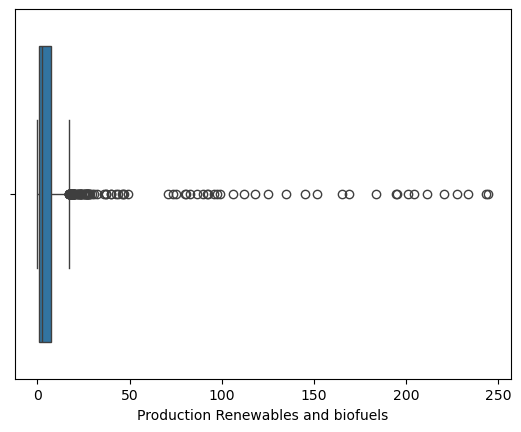

In [25]:
import seaborn as sns
sns.boxplot(x=combined_df['Production Renewables and biofuels'])


<h2> Normalize Energy Units

If your dataset includes energy in different units (e.g., Mtoe, TWh), standardize them into consistent units. This is especially crucial when working across different countries and energy sources.
Convert all units to a standard format, e.g., Mtoe (Million tons of oil equivalent) for energy production, and use consistent units for GHG emissions

<h2> Feature Engineering

In [26]:
#Renewable Energy Share

combined_df['Renewable Energy Share (%)'] = (combined_df['Production Renewables and biofuels'] / combined_df['Production']) * 100
print(combined_df['Renewable Energy Share (%)'])

0       9.532529
1      10.136637
2      10.572440
3      11.270517
4      11.537683
         ...    
919    51.984261
920    53.869480
921    62.394538
922    63.095135
923    62.968153
Name: Renewable Energy Share (%), Length: 924, dtype: float64


In [27]:
#CO2 per Energy Unit

combined_df['CO2 per Energy Unit'] = combined_df['CO2 Emissions - National Total (including int. aviation)'] / combined_df['Production']
print(combined_df['CO2 per Energy Unit'] )

0      6.635894
1      6.632077
2      6.545415
3      6.474221
4      6.560684
         ...   
919    1.485988
920    1.428315
921    1.361650
922    1.364643
923    1.318613
Name: CO2 per Energy Unit, Length: 924, dtype: float64


In [28]:
#Energy Intensity
combined_df['Energy Intensity per GDP'] = combined_df['Total Gross Inland Consumption'] / combined_df['GDP2015 [Mrd EUR at 2015 exchange rates]']
print(combined_df['Energy Intensity per GDP'])

0      232955.350072
1      208874.848424
2       62315.521002
3       26070.668350
4        9663.576614
           ...      
919        31.215717
920        31.784959
921        27.029783
922        26.902146
923        23.161462
Name: Energy Intensity per GDP, Length: 924, dtype: float64


In [29]:

print(combined_df.replace([np.inf, -np.inf], np.nan).isna().sum())


Country                                            0
Year                                               0
Production                                         0
Production Solid fossil fuels                      0
Production Oil and petroleum products              0
                                                ... 
GDP2015 [Mrd EUR at 2015 exchange rates]           0
GDP-market prices [Mrd EUR at current prices]      0
Renewable Energy Share (%)                        12
CO2 per Energy Unit                               12
Energy Intensity per GDP                         345
Length: 107, dtype: int64


In [30]:
combined_df['Renewable Energy Share (%)'].replace([np.inf, -np.inf], 0, inplace=True)
combined_df['CO2 per Energy Unit'].replace([np.inf, -np.inf], 0, inplace=True)
combined_df['Energy Intensity per GDP'].replace([np.inf, -np.inf], np.nan, inplace=True)
combined_df['Energy Intensity per GDP'].fillna(combined_df['Energy Intensity per GDP'].mean(), inplace=True)


In [31]:
print(combined_df['Renewable Energy Share (%)'].isnull().sum())


12


In [32]:
# Replace empty (NaN) values with 0.0 in the 'Renewable Energy Share (%)' column
combined_df['Renewable Energy Share (%)'].fillna(0.0, inplace=True)

# Verify that all missing values have been replaced
print(combined_df['Renewable Energy Share (%)'].isnull().sum())


0


In [33]:
combined_df.to_csv('cleaned_energy_data.csv', index=False)


In [34]:
cleaned_energy_data= pd.read_csv('cleaned_energy_data.csv', index_col=None ,sep=',')

EU27_Energy_Data = cleaned_energy_data[cleaned_energy_data['Country'] == 'EU27_2020']

Energy_Data_Without_EU27 = cleaned_energy_data[cleaned_energy_data['Country'] != 'EU27_2020']

EU27_Energy_Data.to_csv('EU27_Energy_Data.csv', index=False)
Energy_Data_Without_EU27.to_csv('Energy_Data_Without_EU27.csv', index=False)


In [60]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')

In [35]:
# Display the column names as a list
column_names = cleaned_energy_data.columns.tolist()
print(column_names)


['Country', 'Year', 'Production', 'Production Solid fossil fuels', 'Production Oil and petroleum products', 'Production Natural gas', 'Production Nuclear', 'Production Renewables and biofuels', 'Production Renewables and biofuels: Hydro', 'Production Renewables and biofuels: Wind', 'Production Renewables and biofuels: Solar photovoltaic', 'Production Renewables and biofuels: Solar thermal', 'Production Renewables and biofuels: Solid biofuels', 'Production Biogases', 'Production Liquid biofuels', 'Total Imports', 'Imports Solid fossil fuels', 'Imports Oil and petroleum products', 'Imports Natural gas', 'Imports Renewables and biofuels', 'Imports Electricity', 'Total Exports', 'Exports Solid fossil fuels', 'Exports Oil and petroleum products', 'Exports Natural gas', 'Exports Renewables and biofuels', 'Exports Electricity', 'Total Gross Inland Consumption', 'Consumption by Solid fossil fuels', 'Consumption by Manufactured gases', 'Consumption by Peat and peat products', 'Consumption by Oi

In [36]:
cleaned_energy_data.head(200)

,Country,Year,Production,Production Solid fossil fuels,Production Oil and petroleum products,Production Natural gas,Production Nuclear,Production Renewables and biofuels,Production Renewables and biofuels: Hydro,Production Renewables and biofuels: Wind,...,International Navigation GHG,GHG total emissions [index 1990=100][%],Total GHG per capita [t CO2 eq./capita],Total GHG - GDP Intensity [ton CO2 eq./M€'15],Total Population [thousands of people],GDP2015 [Mrd EUR at 2015 exchange rates],GDP-market prices [Mrd EUR at current prices],Renewable Energy Share (%),CO2 per Energy Unit,Energy Intensity per GDP
0,EU27_2020,1990,741.704823,305.507545,40.414990,123.067252,188.580208,70.703227,24.388936,0.066146,...,5101.09510,0.151766,0.406356,37.733227,0.265549,0.006253,0.054146,9.532529,6.635894,232955.350072
1,EU27_2020,1991,726.044770,279.517761,39.058758,128.543796,193.463900,73.596523,25.418195,0.093337,...,5387.13019,0.170276,0.406690,39.301450,0.270253,0.006947,0.053033,10.136637,6.632077,208874.848424
2,EU27_2020,1992,713.105377,266.584992,38.510757,126.784775,193.848066,75.392635,26.455971,0.130481,...,5647.46529,0.188813,0.437057,38.690296,0.210733,0.022641,0.055936,10.572440,6.545415,62315.521002
3,EU27_2020,1993,708.997544,250.975029,38.417307,129.610770,199.597807,79.907686,27.151247,0.183784,...,5760.56238,0.204031,0.429819,41.595245,0.221099,0.054063,0.060517,11.270517,6.474221,26070.668350
4,EU27_2020,1994,696.703899,239.995957,40.007048,125.163327,198.979163,80.383484,28.016521,0.270939,...,6029.49658,0.222241,0.435456,40.757922,0.231202,0.145097,0.062360,11.537683,6.560684,9663.576614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Germany,2020,97.903637,23.387789,3.111447,4.030840,16.576800,46.593646,1.609716,11.358727,...,3403.73000,0.764689,0.081829,9.960614,1.420488,3.556837,1.379789,47.591333,7.615791,80.094770
196,Germany,2021,103.629466,27.543709,2.975609,3.867185,17.768590,47.203857,1.690198,9.816767,...,3617.45000,0.733639,0.094655,11.309425,1.251815,3.108810,1.490088,45.550613,7.506759,95.324255
197,Germany,2022,97.313339,28.490846,2.841544,3.612028,8.938000,49.364426,1.515477,10.732244,...,3876.81000,0.835340,0.093293,12.066351,1.258885,3.148363,1.709086,50.727296,7.988423,89.655558
198,Estonia,1990,6.258144,0.000000,0.000000,0.000000,0.000000,0.187852,0.000000,0.000000,...,2.06858,0.000000,0.000000,0.187852,0.000000,0.000000,0.000000,3.001721,6.452576,2755.008750


<h1>EDA

In [397]:
EU27_Energy_Data

,Country,Year,Production,Production Solid fossil fuels,Production Oil and petroleum products,Production Natural gas,Production Nuclear,Production Renewables and biofuels,Production Renewables and biofuels: Hydro,Production Renewables and biofuels: Wind,...,International Navigation GHG,GHG total emissions [index 1990=100][%],Total GHG per capita [t CO2 eq./capita],Total GHG - GDP Intensity [ton CO2 eq./M€'15],Total Population [thousands of people],GDP2015 [Mrd EUR at 2015 exchange rates],GDP-market prices [Mrd EUR at current prices],Renewable Energy Share (%),CO2 per Energy Unit,Energy Intensity per GDP
0,EU27_2020,1990,741.704823,305.507545,40.414990,123.067252,188.580208,70.703227,24.388936,0.066146,...,5101.09510,0.151766,0.406356,37.733227,0.265549,0.006253,0.054146,9.532529,6.635894,232955.350072
1,EU27_2020,1991,726.044770,279.517761,39.058758,128.543796,193.463900,73.596523,25.418195,0.093337,...,5387.13019,0.170276,0.406690,39.301450,0.270253,0.006947,0.053033,10.136637,6.632077,208874.848424
2,EU27_2020,1992,713.105377,266.584992,38.510757,126.784775,193.848066,75.392635,26.455971,0.130481,...,5647.46529,0.188813,0.437057,38.690296,0.210733,0.022641,0.055936,10.572440,6.545415,62315.521002
3,EU27_2020,1993,708.997544,250.975029,38.417307,129.610770,199.597807,79.907686,27.151247,0.183784,...,5760.56238,0.204031,0.429819,41.595245,0.221099,0.054063,0.060517,11.270517,6.474221,26070.668350
4,EU27_2020,1994,696.703899,239.995957,40.007048,125.163327,198.979163,80.383484,28.016521,0.270939,...,6029.49658,0.222241,0.435456,40.757922,0.231202,0.145097,0.062360,11.537683,6.560684,9663.576614
5,EU27_2020,1995,705.444528,238.517377,39.481553,127.275868,204.531543,82.539814,27.964978,0.316156,...,6337.71040,0.272443,0.434095,42.383980,0.246870,0.218021,0.065414,11.700398,6.555895,6657.990272
6,EU27_2020,1996,722.659317,233.218319,39.164686,136.041940,214.742249,86.391005,28.133042,0.377339,...,6636.49890,0.295128,0.430727,44.773494,0.275892,0.319613,0.068130,11.954596,6.529709,4694.147015
7,EU27_2020,1997,715.329871,229.783964,40.264588,125.678901,216.856090,89.649459,28.526001,0.575487,...,6819.19560,0.349796,0.429915,46.629696,0.277372,0.435137,0.072834,12.532604,6.500891,3427.453062
8,EU27_2020,1998,684.144396,206.985865,39.588088,120.045687,215.220621,92.118525,29.488008,0.893956,...,7110.87180,0.383757,0.429700,46.964749,0.298628,0.410970,0.077843,13.464778,6.746194,3649.282617
9,EU27_2020,1999,675.356449,195.942253,40.943606,115.107518,219.054500,92.478299,29.305846,1.148120,...,7430.92700,0.417664,0.435219,45.976179,0.325093,0.458196,0.081291,13.693258,6.731948,3245.671376


In [398]:
EU27_Energy_Data.describe()


,Year,Production,Production Solid fossil fuels,Production Oil and petroleum products,Production Natural gas,Production Nuclear,Production Renewables and biofuels,Production Renewables and biofuels: Hydro,Production Renewables and biofuels: Wind,Production Renewables and biofuels: Solar photovoltaic,...,International Navigation GHG,GHG total emissions [index 1990=100][%],Total GHG per capita [t CO2 eq./capita],Total GHG - GDP Intensity [ton CO2 eq./M€'15],Total Population [thousands of people],GDP2015 [Mrd EUR at 2015 exchange rates],GDP-market prices [Mrd EUR at current prices],Renewable Energy Share (%),CO2 per Energy Unit,Energy Intensity per GDP
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,...,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2006.00000,677.991883,175.544909,35.325423,99.919260,209.313155,142.502294,28.142056,11.399903,3.535670,...,9798.819625,1.149139,0.467287,56.205410,1.162261,7.143538,3.605762,21.565361,6.356465,17315.065843
std,9.66954,41.892735,56.672160,8.489442,28.881905,19.116293,58.263972,2.123911,11.904585,4.971739,...,3004.991593,0.856216,0.051864,11.644243,0.955371,6.809590,4.999976,10.220920,0.319836,53843.950286
min,1990.00000,562.857215,83.590076,18.757105,34.889713,155.481428,70.703227,23.752144,0.066146,0.001365,...,5101.095100,0.151766,0.406356,37.733227,0.210733,0.006253,0.053033,9.532529,5.735963,76.347937
25%,1998.00000,668.453139,135.227398,29.001748,85.866623,196.180921,92.118525,26.457845,0.893956,0.007251,...,7110.871800,0.383757,0.435219,46.529905,0.298628,0.435137,0.077843,13.464778,6.098514,108.348076
50%,2006.00000,689.703454,172.733679,38.510757,110.471178,208.966146,125.278820,28.016521,6.767947,0.214056,...,10112.507400,0.834368,0.445269,57.051003,0.672129,5.465497,0.859224,17.801303,6.500891,295.973208
75%,2014.00000,703.762086,206.985865,40.664729,120.045687,222.051376,194.772845,29.568480,19.119231,7.628300,...,11782.563600,1.962197,0.486471,67.559059,2.163791,13.318698,5.387580,28.911259,6.627312,3427.453062
max,2022.00000,741.704823,305.507545,47.393578,136.041940,239.962441,244.558835,32.107785,36.226735,17.688152,...,15920.742400,2.655869,0.601345,72.937163,2.687598,17.737342,16.258399,43.233489,6.746194,232955.350072


In [37]:
Energy_Data_Without_EU27.describe()

,Year,Production,Production Solid fossil fuels,Production Oil and petroleum products,Production Natural gas,Production Nuclear,Production Renewables and biofuels,Production Renewables and biofuels: Hydro,Production Renewables and biofuels: Wind,Production Renewables and biofuels: Solar photovoltaic,...,International Navigation GHG,GHG total emissions [index 1990=100][%],Total GHG per capita [t CO2 eq./capita],Total GHG - GDP Intensity [ton CO2 eq./M€'15],Total Population [thousands of people],GDP2015 [Mrd EUR at 2015 exchange rates],GDP-market prices [Mrd EUR at current prices],Renewable Energy Share (%),CO2 per Energy Unit,Energy Intensity per GDP
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2006.000000,25.110810,6.501663,1.308349,3.700713,7.752339,5.277863,1.042298,0.422219,0.130951,...,362.756169,0.042561,0.017307,2.081682,0.043047,0.264575,0.133547,37.684315,90.251097,2215.747376
std,9.527252,35.576062,17.363472,2.664531,10.336672,20.466393,7.427354,1.624291,1.179932,0.496821,...,621.041651,0.101447,0.041601,2.445951,0.154175,0.622310,0.422567,31.892725,751.760741,6005.199220
min,1990.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.372210,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.161462
25%,1998.000000,3.735156,0.000000,0.000000,0.000000,0.000000,0.840831,0.018702,0.000102,0.000000,...,27.734500,0.000000,0.000000,0.449102,0.000000,0.000000,0.000000,12.033001,4.763641,124.636905
50%,2006.000000,10.786733,0.000000,0.083786,0.077816,0.000000,2.183993,0.253654,0.016079,0.000184,...,128.278900,0.005565,0.000000,1.031903,0.004777,0.014208,0.000000,26.535914,6.446373,1346.417228
75%,2014.000000,31.333885,3.417520,1.159576,2.286479,4.822907,6.289845,1.345814,0.257942,0.016696,...,324.530850,0.025569,0.008423,3.238817,0.024968,0.204298,0.037955,60.327578,12.061982,2755.008750
max,2022.000000,186.605985,121.689231,19.782794,68.880531,116.473517,49.364426,6.797936,11.358727,5.185211,...,3876.810000,0.835340,0.217135,12.066351,1.426412,4.027795,3.851353,100.000000,13817.949791,118104.496016


In [38]:
print(cleaned_energy_data['Country'].unique())

['EU27_2020' 'Belgium' 'Bulgaria' 'Czechia' 'Denmark' 'Germany' 'Estonia'
 'Ireland' 'Greece' 'Spain' 'France' 'Croatia' 'Italy' 'Cyprus' 'Latvia'
 'Lithuania' 'Luxembourg' 'Hungary' 'Malta' 'Netherlands' 'Austria'
 'Poland' 'Portugal' 'Romania' 'Slovenia' 'Slovakia' 'Finland' 'Sweden']


In [39]:
list(Energy_Data_Without_EU27.columns)


['Country',
 'Year',
 'Production',
 'Production Solid fossil fuels',
 'Production Oil and petroleum products',
 'Production Natural gas',
 'Production Nuclear',
 'Production Renewables and biofuels',
 'Production Renewables and biofuels: Hydro',
 'Production Renewables and biofuels: Wind',
 'Production Renewables and biofuels: Solar photovoltaic',
 'Production Renewables and biofuels: Solar thermal',
 'Production Renewables and biofuels: Solid biofuels',
 'Production Biogases',
 'Production Liquid biofuels',
 'Total Imports',
 'Imports Solid fossil fuels',
 'Imports Oil and petroleum products',
 'Imports Natural gas',
 'Imports Renewables and biofuels',
 'Imports Electricity',
 'Total Exports',
 'Exports Solid fossil fuels',
 'Exports Oil and petroleum products',
 'Exports Natural gas',
 'Exports Renewables and biofuels',
 'Exports Electricity',
 'Total Gross Inland Consumption',
 'Consumption by Solid fossil fuels',
 'Consumption by Manufactured gases',
 'Consumption by Peat and peat

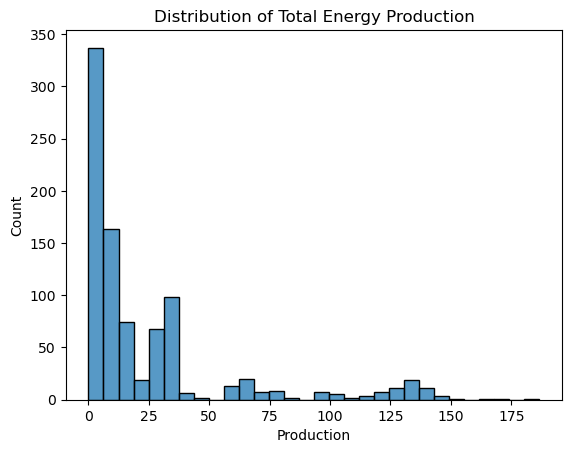

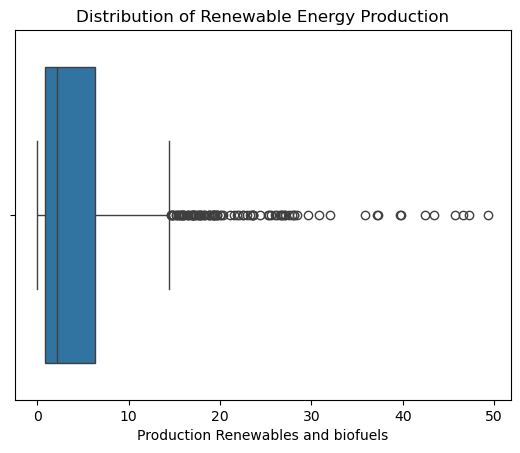

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(Energy_Data_Without_EU27['Production'], bins=30)
plt.title('Distribution of Total Energy Production')
plt.show()

sns.boxplot(x='Production Renewables and biofuels', data=Energy_Data_Without_EU27)
plt.title('Distribution of Renewable Energy Production')
plt.show()


<h2> Correlations


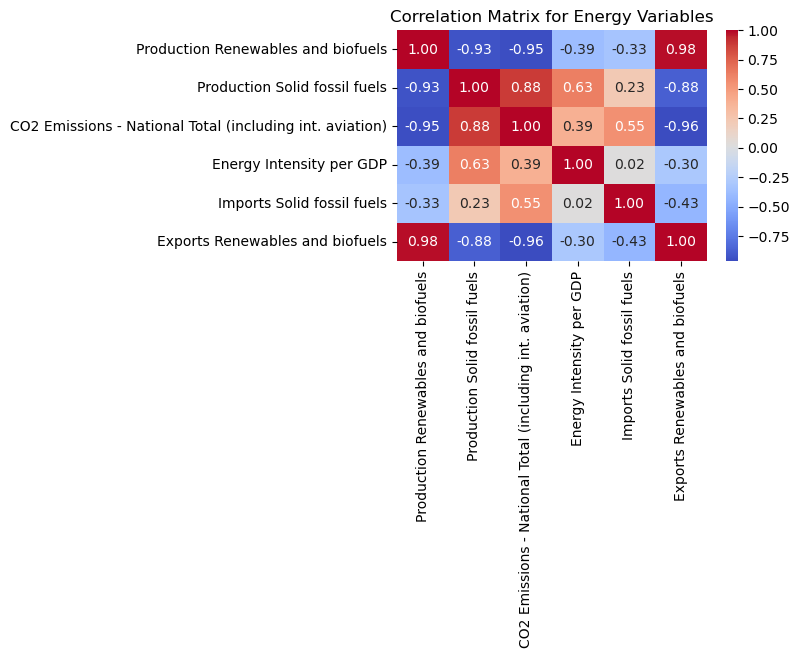

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical variables for correlation analysis
correlation_df = EU27_Energy_Data[['Production Renewables and biofuels',
                              'Production Solid fossil fuels', 
                              'CO2 Emissions - National Total (including int. aviation)', 
                              'Energy Intensity per GDP', 
                              'Imports Solid fossil fuels', 
                              'Exports Renewables and biofuels']]

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(5,3))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix for Energy Variables')
plt.show()


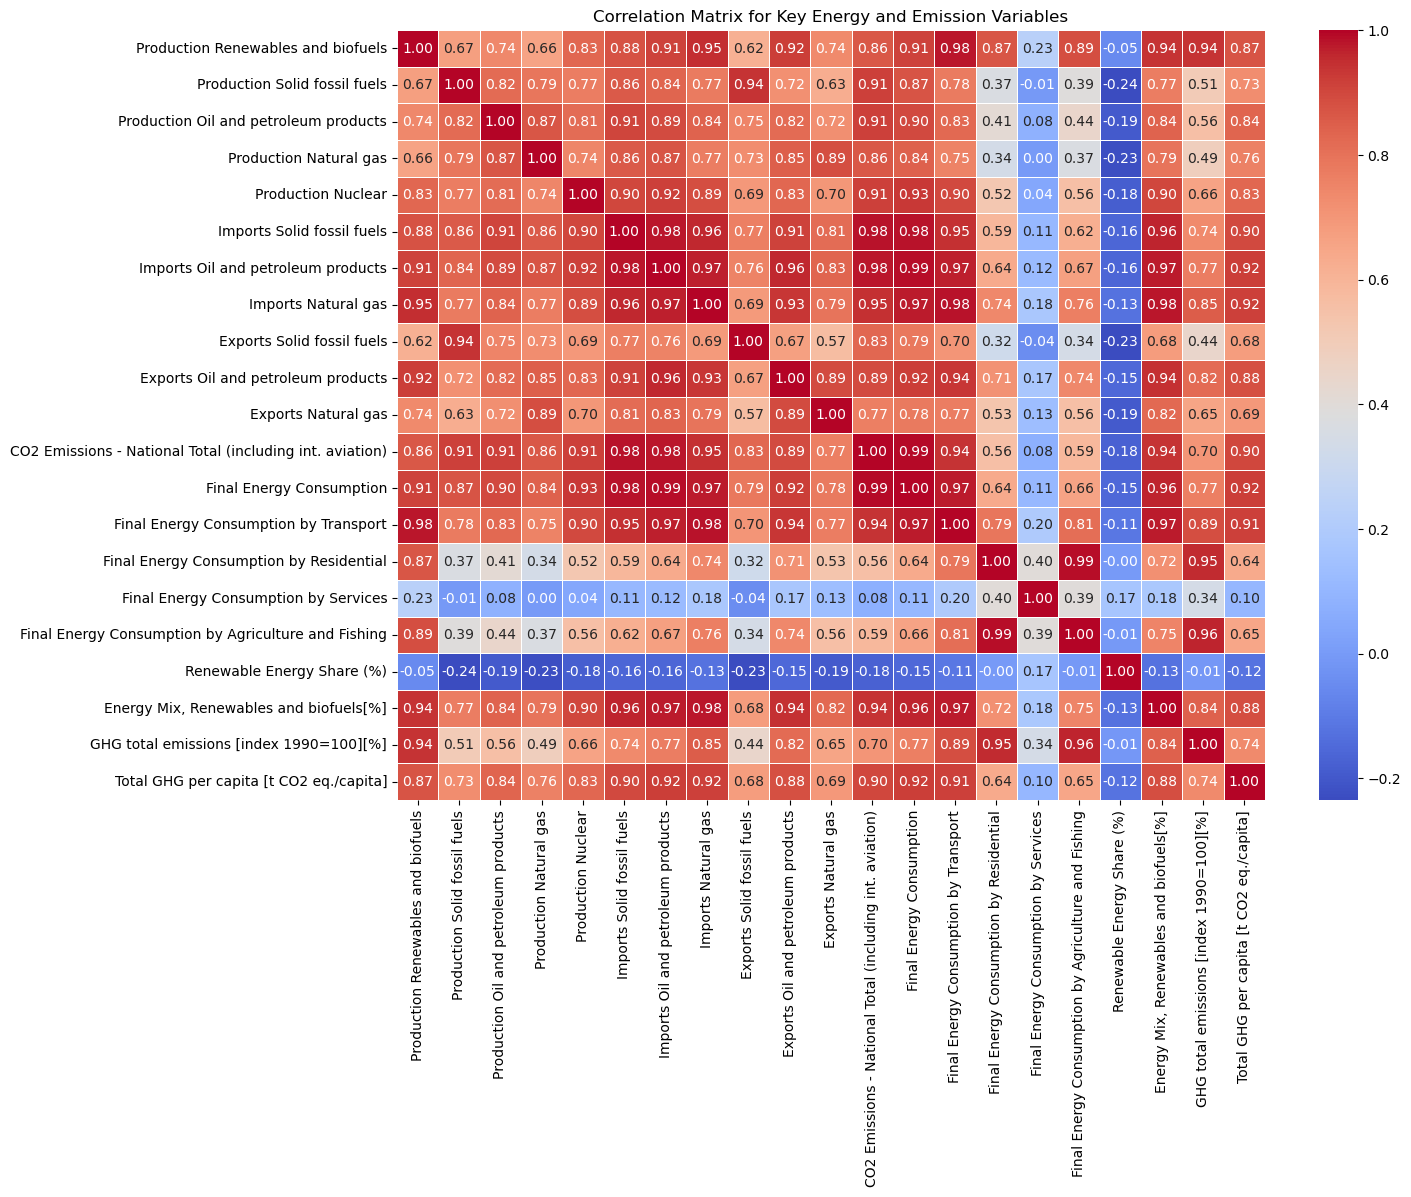

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical variables for correlation analysis based on the provided list
correlation_df = combined_df[['Production Renewables and biofuels', 
                              'Production Solid fossil fuels', 
                              'Production Oil and petroleum products',
                              'Production Natural gas',
                              'Production Nuclear',
                              'Imports Solid fossil fuels', 
                              'Imports Oil and petroleum products',
                              'Imports Natural gas',
                              'Exports Solid fossil fuels', 
                              'Exports Oil and petroleum products', 
                              'Exports Natural gas',
                              'CO2 Emissions - National Total (including int. aviation)', 
                              'Final Energy Consumption',
                              'Final Energy Consumption by Transport',
                              'Final Energy Consumption by Residential',
                              'Final Energy Consumption by Services',
                              'Final Energy Consumption by Agriculture and Fishing',
                              'Renewable Energy Share (%)',
                              'Energy Mix, Renewables and biofuels[%]',
                              'GHG total emissions [index 1990=100][%]',
                              'Total GHG per capita [t CO2 eq./capita]']]

# Compute the correlation matrix
corr_matrix = correlation_df.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(14,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Key Energy and Emission Variables')
plt.show()


Production of Renewables and Biofuels:
Positive correlation with Renewable Energy Share (0.66) and Energy Mix, Renewables and biofuels (0.94): Countries producing more renewable energy tend to have a higher share of renewables in their energy mix.
Negative correlation with Production Solid Fossil Fuels (-0.67) and Production Oil and Petroleum Products (-0.74): As renewable energy production increases, production from fossil fuels and oil tends to decrease.

Fossil Fuel Imports and Exports:
Strong positive correlations between Imports and Exports of Oil and Petroleum Products (0.99 for solid fossil fuels, 0.98 for oil and petroleum). This suggests that countries that import large amounts of these resources also export them, indicating energy trade dynamics.
Solid fossil fuel Imports and Exports correlate strongly (0.91), indicating that countries with higher import levels also tend to export more of these fuels, perhaps due to processing or refining activities.

CO2 Emissions:
Strong positive correlation with Final Energy Consumption (0.98), especially consumption in the transport (0.99) and residential (0.74) sectors. This shows that as energy consumption increases, so do CO2 emissions.
GHG total emissions and Total GHG per capita are highly correlated with Solid Fossil Fuel production and consumption, indicating that fossil fuel reliance significantly drives emissions.

Renewable Energy Share:
Weak negative correlations with Fossil Fuel Imports/Exports: As renewable energy share increases, reliance on fossil fuel imports and exports decreases.
Positive correlation with Energy Mix of Renewables and Biofuels (0.68): Countries that are increasing renewable energy production are likely seeing this reflected in their overall energy mix.

Final Energy Consumption:
Positive correlations across the sectors (Transport, Residential, Services). This indicates that as energy consumption increases in any one sector, it tends to increase across the others too.
Strong positive correlations with CO2 emissions and GHG total emissions: This shows that energy consumption is a direct driver of greenhouse gas emissions.

GHG Emissions and Energy Intensity:
GHG total emissions show strong correlations with Energy Mix, Fossil Fuels (0.88). Countries with a larger share of fossil fuels in their energy mix have higher emissions.
Total GHG per capita is highly correlated with Final Energy Consumption by Transport (0.99), suggesting that personal or public transport is a major contributor to per capita emissions.

Key Insights:
Countries that are focusing on renewables show a decline in fossil fuel production and imports/exports.
CO2 emissions are highly linked to energy consumption, especially in transport and residential sectors.
Fossil fuel dependency significantly drives GHG emissions, which are reduced in countries that focus more on renewables.
The shift towards renewables reduces overall fossil fuel consumption and emissions, but transport and residential energy use remain critical sectors to address for emission reductions.
This correlation analysis provides critical insights for your EU Energy Transition & Sustainability project, helping identify key relationships and dependencies between energy production, imports/exports, and CO2 emissions.


Final Energy Consumption by Services    28
dtype: int64

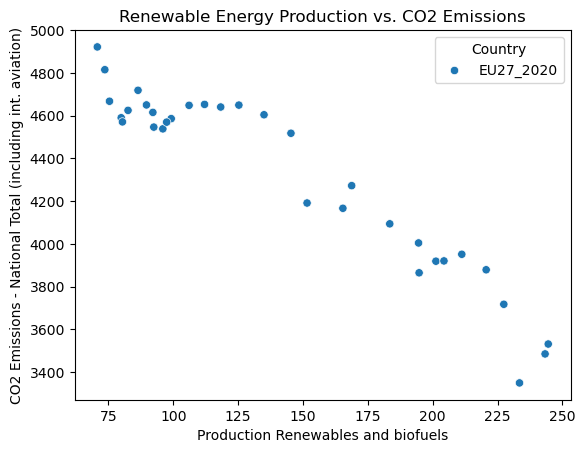

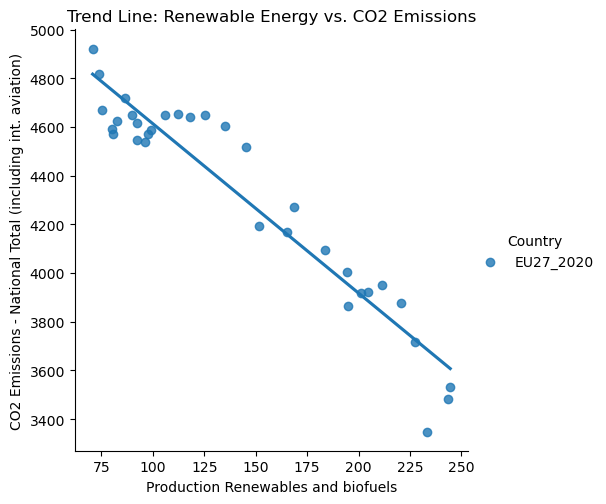

In [266]:
# Scatter plot to visualize the relationship between renewable energy production and CO2 emissions
sns.scatterplot(x='Production Renewables and biofuels', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=EU27_Energy_Data)
plt.title('Renewable Energy Production vs. CO2 Emissions')
plt.show()

# Adding a trend line to visualize the relationship
sns.lmplot(x='Production Renewables and biofuels', y='CO2 Emissions - National Total (including int. aviation)', data=EU27_Energy_Data, hue='Country', ci=None)
plt.title('Trend Line: Renewable Energy vs. CO2 Emissions')
plt.show()


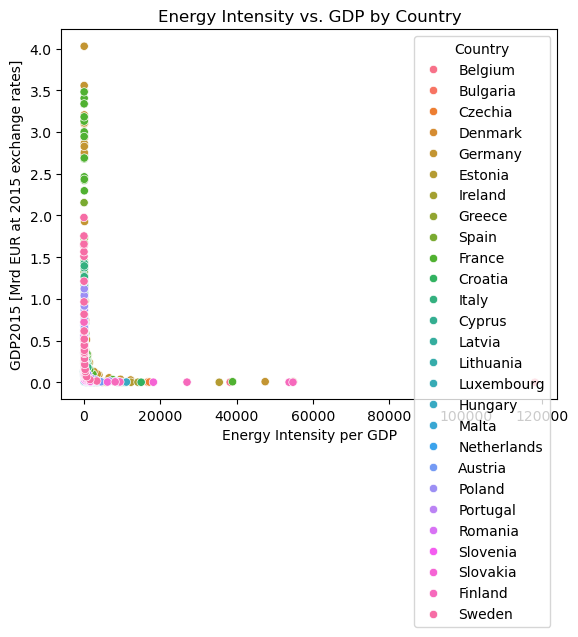

In [268]:
# Scatter plot for Energy Intensity vs. GDP
sns.scatterplot(x='Energy Intensity per GDP', y='GDP2015 [Mrd EUR at 2015 exchange rates]', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Intensity vs. GDP by Country')
plt.show()


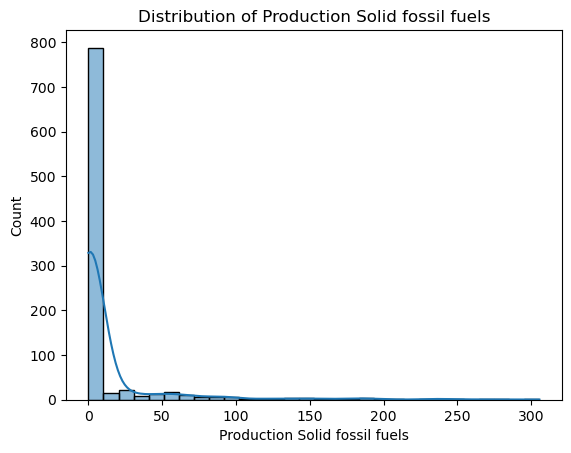

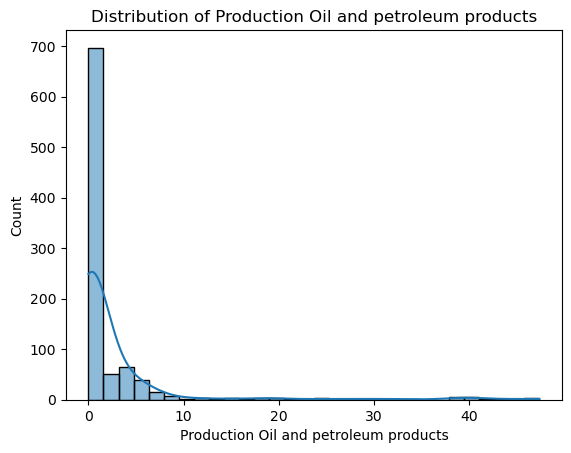

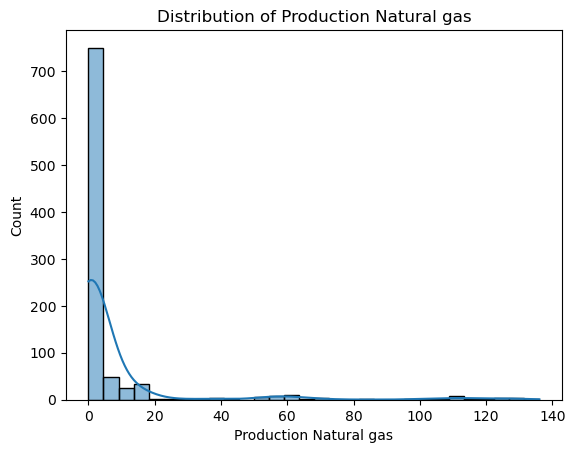

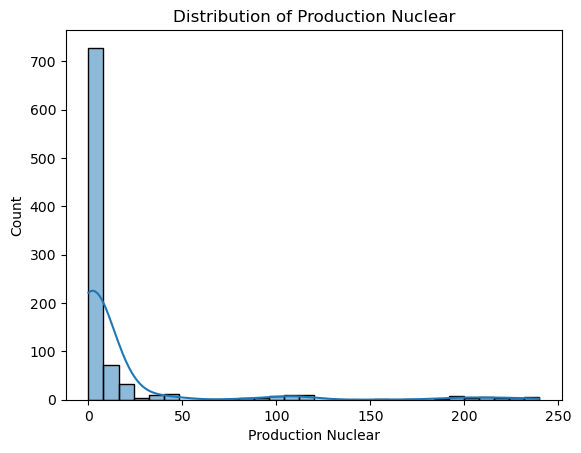

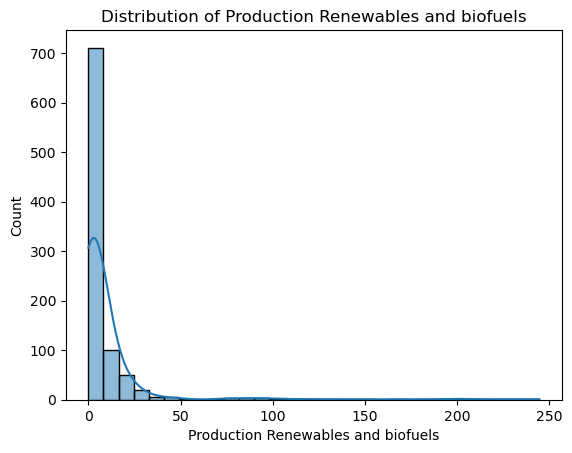

In [275]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of key production variables to check distribution
production_vars = ['Production Solid fossil fuels', 'Production Oil and petroleum products', 'Production Natural gas', 
                   'Production Nuclear', 'Production Renewables and biofuels']

# Plot histograms for each production variable
for var in production_vars:
    sns.histplot(combined_df[var], bins=30, kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()


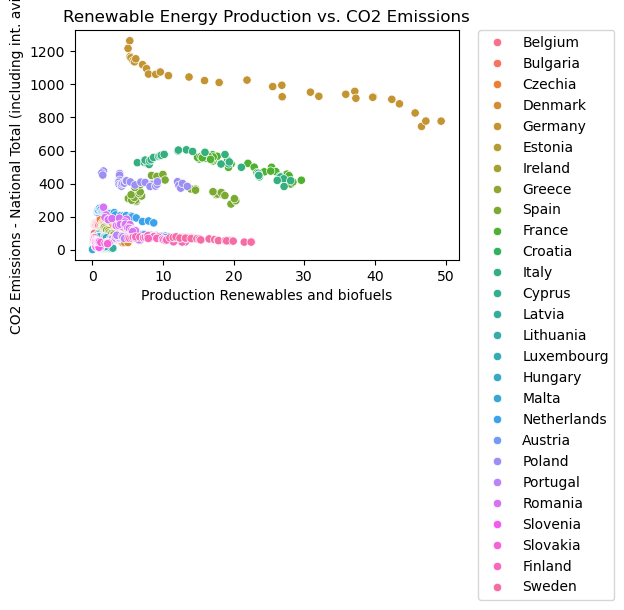

In [308]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='Production Renewables and biofuels', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Renewable Energy Production vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


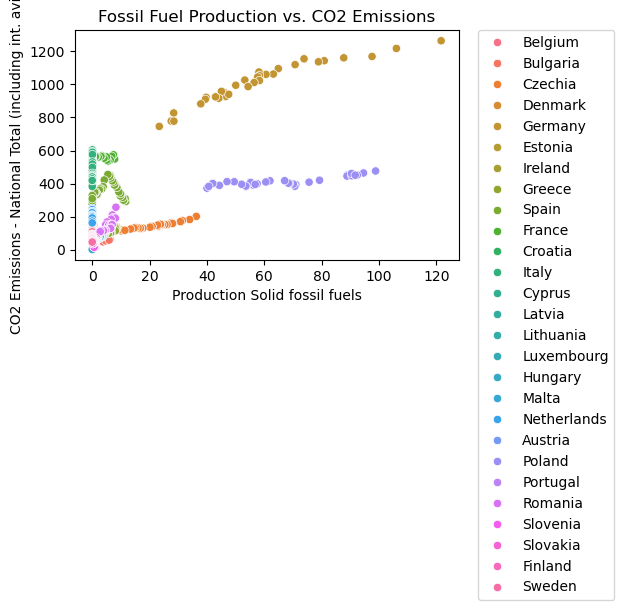

In [307]:
sns.scatterplot(x='Production Solid fossil fuels', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Fossil Fuel Production vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()



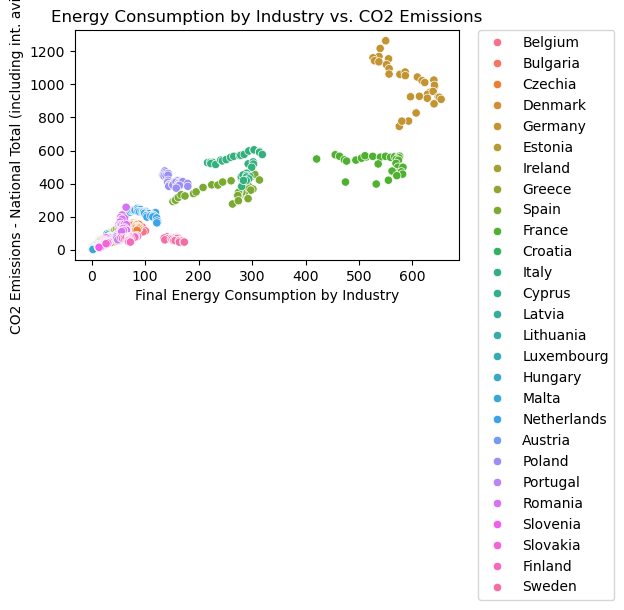

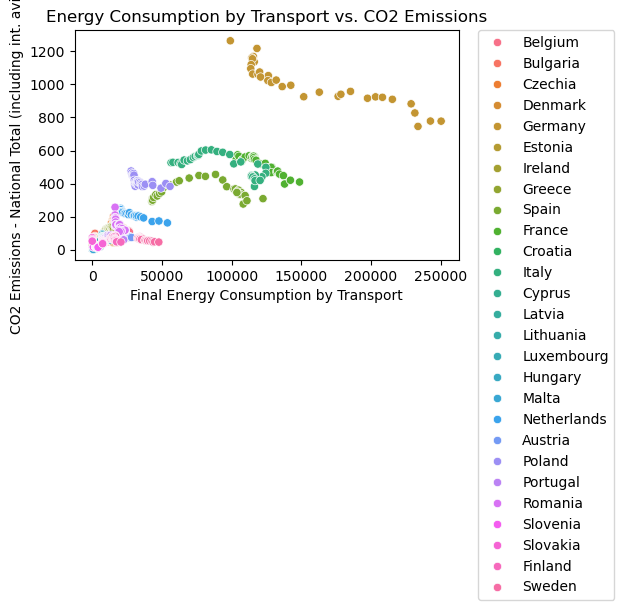

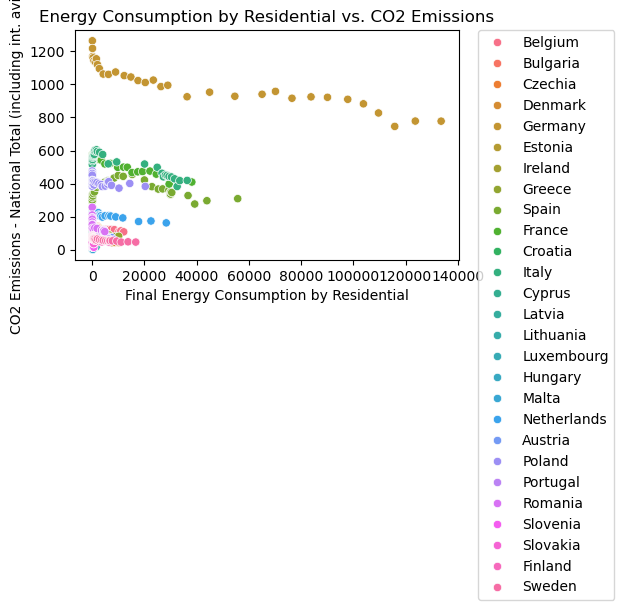

In [306]:
sns.scatterplot(x='Final Energy Consumption by Industry', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Consumption by Industry vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Final Energy Consumption by Transport', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Consumption by Transport vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Final Energy Consumption by Residential', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Consumption by Residential vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


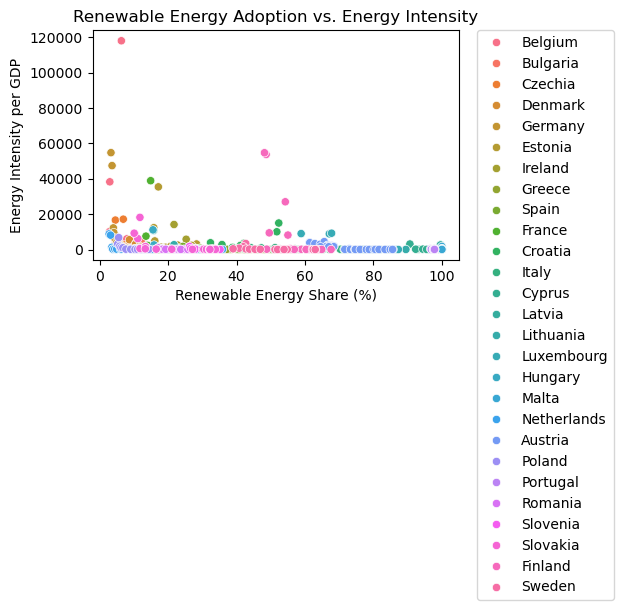

In [305]:
sns.scatterplot(x='Renewable Energy Share (%)', y='Energy Intensity per GDP', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Renewable Energy Adoption vs. Energy Intensity')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()



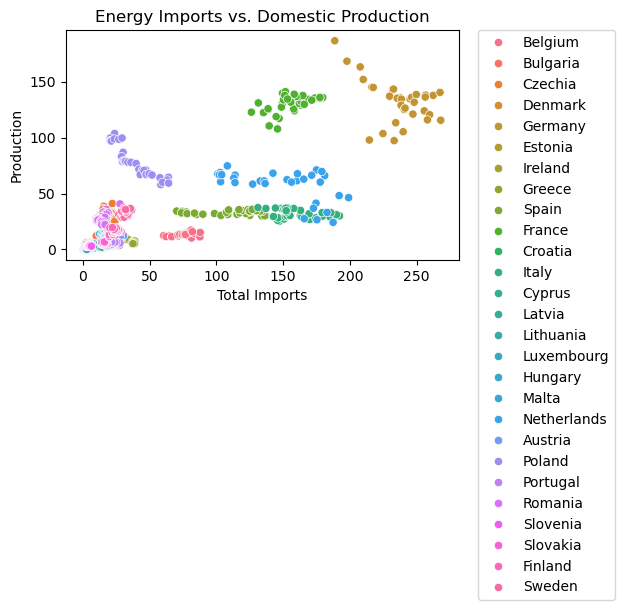

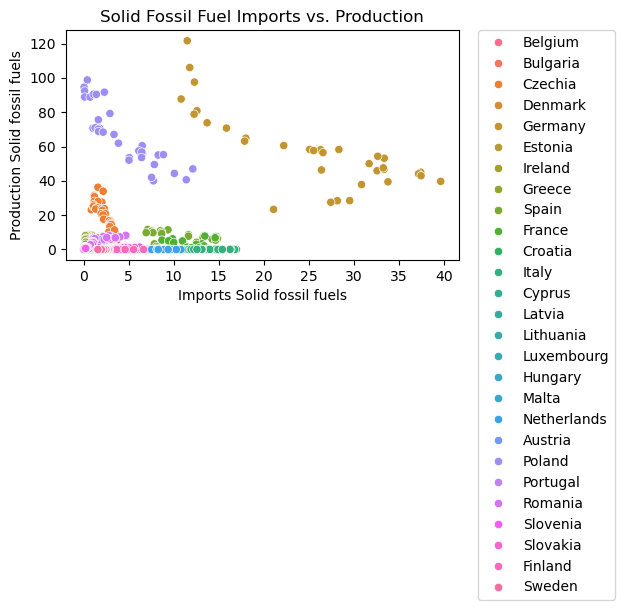

In [304]:
sns.scatterplot(x='Total Imports', y='Production', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Imports vs. Domestic Production')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Imports Solid fossil fuels', y='Production Solid fossil fuels', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Solid Fossil Fuel Imports vs. Production')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


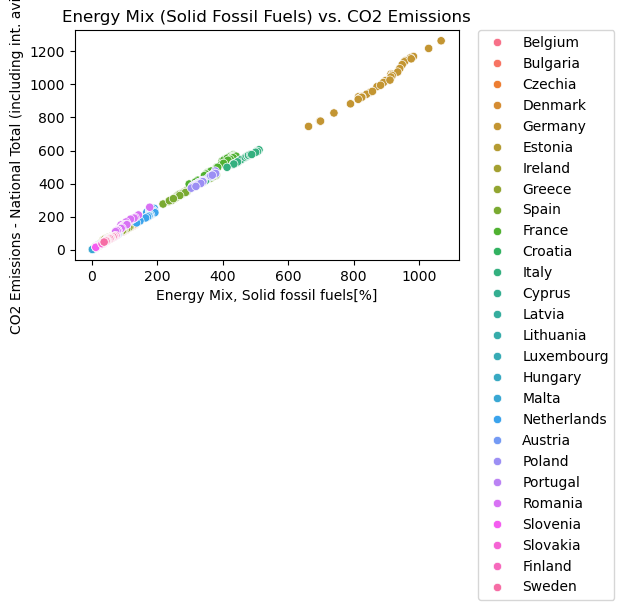

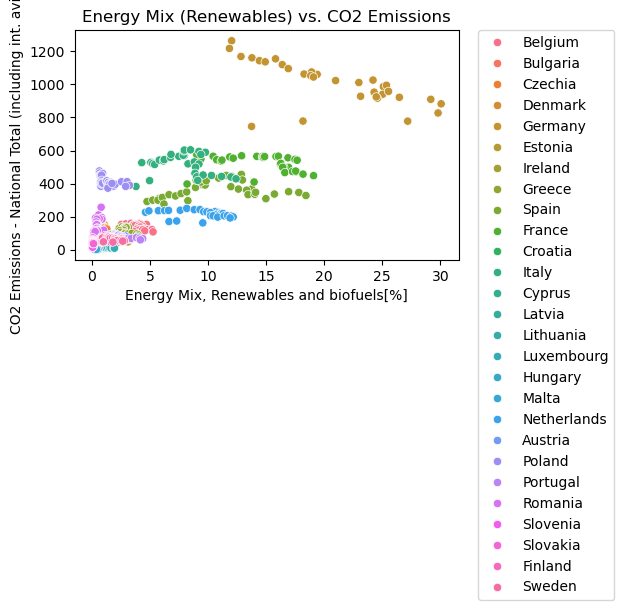

In [303]:
sns.scatterplot(x='Energy Mix, Solid fossil fuels[%]', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Mix (Solid Fossil Fuels) vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Energy Mix, Renewables and biofuels[%]', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Mix (Renewables) vs. CO2 Emissions')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


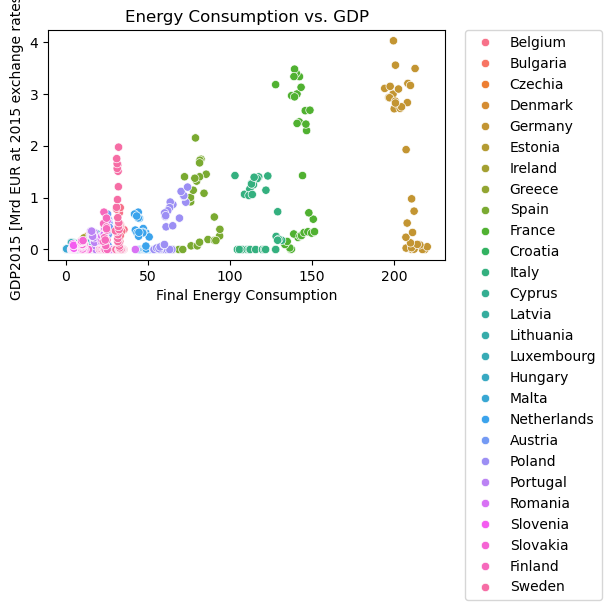

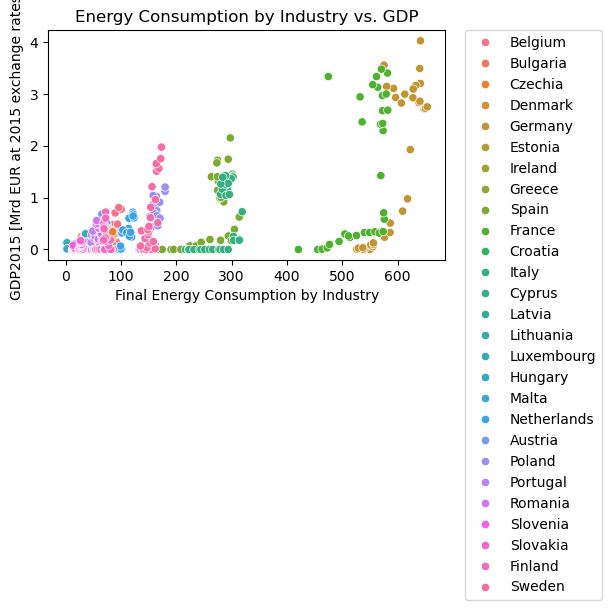

In [302]:
sns.scatterplot(x='Final Energy Consumption', y='GDP2015 [Mrd EUR at 2015 exchange rates]', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Consumption vs. GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Final Energy Consumption by Industry', y='GDP2015 [Mrd EUR at 2015 exchange rates]', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Consumption by Industry vs. GDP')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


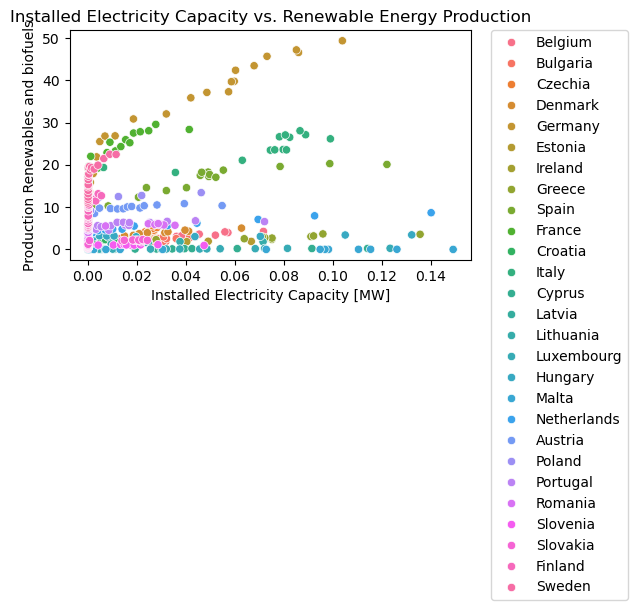

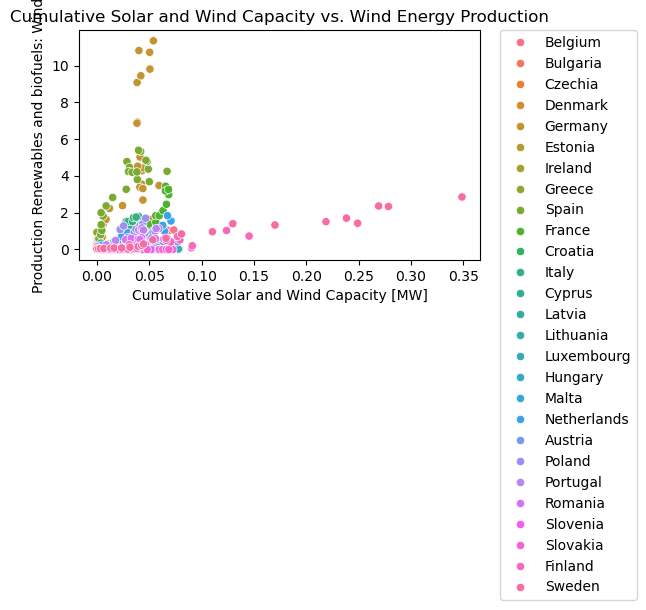

In [299]:
sns.scatterplot(x='Installed Electricity Capacity [MW]', y='Production Renewables and biofuels', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Installed Electricity Capacity vs. Renewable Energy Production')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()

sns.scatterplot(x='Cumulative Solar and Wind Capacity [MW]', y='Production Renewables and biofuels: Wind', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Cumulative Solar and Wind Capacity vs. Wind Energy Production')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.tight_layout() 
plt.show()


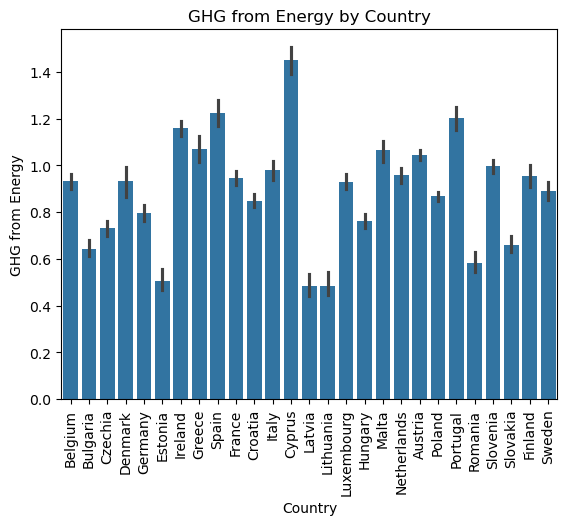

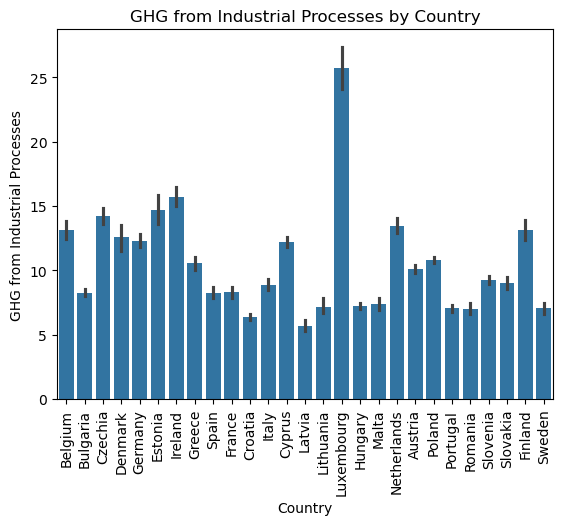

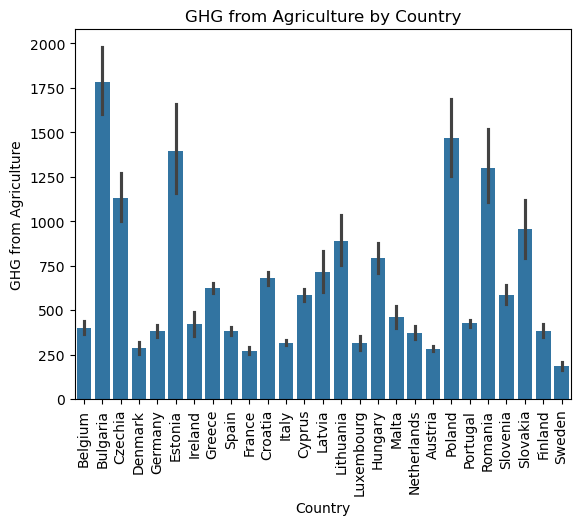

In [293]:
sns.barplot(x='Country', y='GHG from Energy', data=Energy_Data_Without_EU27)
plt.title('GHG from Energy by Country')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Country', y='GHG from Industrial Processes', data=Energy_Data_Without_EU27)
plt.title('GHG from Industrial Processes by Country')
plt.xticks(rotation=90)
plt.show()

sns.barplot(x='Country', y='GHG from Agriculture', data=Energy_Data_Without_EU27)
plt.title('GHG from Agriculture by Country')
plt.xticks(rotation=90)
plt.show()


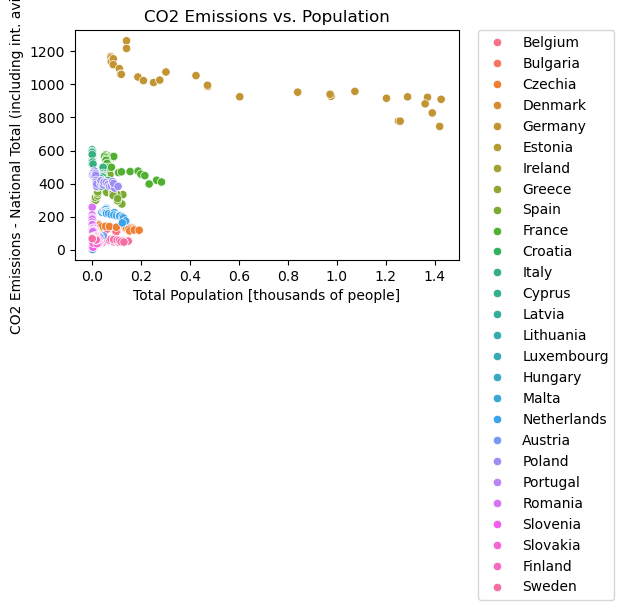

In [291]:

sns.scatterplot(x='Total Population [thousands of people]', y='CO2 Emissions - National Total (including int. aviation)', hue='Country', data=Energy_Data_Without_EU27)

plt.title('CO2 Emissions vs. Population')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

# Show the plot
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


In [321]:
# Calculating energy intensity for additional comparisons (if required)
Energy_Data_Without_EU27['calculated_energy_intensity'] = Energy_Data_Without_EU27['Total Gross Inland Consumption'] / Energy_Data_Without_EU27['GDP2015 [Mrd EUR at 2015 exchange rates]']

# Group by country to see average energy intensity over time
country_energy_intensity = Energy_Data_Without_EU27.groupby('Country')['calculated_energy_intensity'].mean().sort_values()

print(country_energy_intensity)


Country
Austria        1192.038304
Slovenia               inf
Slovakia               inf
Romania                inf
Portugal               inf
Poland                 inf
Netherlands            inf
Malta                  inf
Luxembourg             inf
Lithuania              inf
Latvia                 inf
Italy                  inf
Spain                  inf
Ireland                inf
Greece                 inf
Germany                inf
France                 inf
Finland                inf
Estonia                inf
Denmark                inf
Czechia                inf
Cyprus                 inf
Croatia                inf
Bulgaria               inf
Belgium                inf
Hungary                inf
Sweden                 inf
Name: calculated_energy_intensity, dtype: float64


/var/folders/zm/_fz5yvdn56vghky8mv0y5chc0000gn/T/ipykernel_14624/3777296808.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energy_Data_Without_EU27['calculated_energy_intensity'] = Energy_Data_Without_EU27['Total Gross Inland Consumption'] / Energy_Data_Without_EU27['GDP2015 [Mrd EUR at 2015 exchange rates]']


In [322]:
# Calculating energy consumption per capita
Energy_Data_Without_EU27['energy_per_capita'] = Energy_Data_Without_EU27['Total Gross Inland Consumption'] / Energy_Data_Without_EU27['Total Population [thousands of people]']

# Group by country to analyze the energy consumption per capita
energy_per_capita_by_country = Energy_Data_Without_EU27.groupby('Country')['energy_per_capita'].mean().sort_values()

print(energy_per_capita_by_country)


Country
Netherlands    1.118716e+03
Germany        1.617891e+03
Denmark        2.055298e+03
Ireland        2.496320e+03
France         3.290799e+03
Spain          3.902418e+03
Belgium        5.725538e+03
Poland         6.862699e+03
Greece         1.684770e+04
Slovenia                inf
Slovakia                inf
Romania                 inf
Portugal                inf
Malta                   inf
Luxembourg              inf
Lithuania               inf
Austria                 inf
Italy                   inf
Hungary                 inf
Finland                 inf
Estonia                 inf
Czechia                 inf
Cyprus                  inf
Croatia                 inf
Bulgaria                inf
Latvia                  inf
Sweden                  inf
Name: energy_per_capita, dtype: float64


/var/folders/zm/_fz5yvdn56vghky8mv0y5chc0000gn/T/ipykernel_14624/4180395533.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energy_Data_Without_EU27['energy_per_capita'] = Energy_Data_Without_EU27['Total Gross Inland Consumption'] / Energy_Data_Without_EU27['Total Population [thousands of people]']


In [323]:
# Calculating CO2 emissions per unit of energy produced
Energy_Data_Without_EU27['CO2_per_energy_unit'] = Energy_Data_Without_EU27['CO2 Emissions - National Total (including int. aviation)'] / Energy_Data_Without_EU27['Production']

# Analyzing CO2 per energy unit by country
CO2_per_energy_unit_by_country = Energy_Data_Without_EU27.groupby('Country')['CO2_per_energy_unit'].mean().sort_values()

print(CO2_per_energy_unit_by_country)


Country
Sweden           1.992257
Denmark          3.860688
Netherlands      4.009213
France           4.012484
Finland          4.468787
Estonia          4.585789
Czechia          4.692399
Romania          5.204444
Poland           5.425100
Slovenia         5.670893
Croatia          6.022124
Bulgaria         6.182150
Hungary          6.187085
Latvia           7.586770
Germany          7.597537
Lithuania        7.924557
Austria          8.066309
Slovakia         8.204456
Belgium         10.536742
Spain           10.942735
Greece          12.912431
Portugal        16.593119
Italy           16.657416
Ireland         28.735674
Luxembourg     160.126081
Cyprus         282.313455
Malta                 inf
Name: CO2_per_energy_unit, dtype: float64


/var/folders/zm/_fz5yvdn56vghky8mv0y5chc0000gn/T/ipykernel_14624/100822813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energy_Data_Without_EU27['CO2_per_energy_unit'] = Energy_Data_Without_EU27['CO2 Emissions - National Total (including int. aviation)'] / Energy_Data_Without_EU27['Production']


In [324]:
# Calculating CO2 emissions per unit of energy produced
Energy_Data_Without_EU27['CO2_per_energy_unit'] = Energy_Data_Without_EU27['CO2 Emissions - National Total (including int. aviation)'] / Energy_Data_Without_EU27['Production']

# Analyzing CO2 per energy unit by country
CO2_per_energy_unit_by_country = Energy_Data_Without_EU27.groupby('Country')['CO2_per_energy_unit'].mean().sort_values()

print(CO2_per_energy_unit_by_country)


Country
Sweden           1.992257
Denmark          3.860688
Netherlands      4.009213
France           4.012484
Finland          4.468787
Estonia          4.585789
Czechia          4.692399
Romania          5.204444
Poland           5.425100
Slovenia         5.670893
Croatia          6.022124
Bulgaria         6.182150
Hungary          6.187085
Latvia           7.586770
Germany          7.597537
Lithuania        7.924557
Austria          8.066309
Slovakia         8.204456
Belgium         10.536742
Spain           10.942735
Greece          12.912431
Portugal        16.593119
Italy           16.657416
Ireland         28.735674
Luxembourg     160.126081
Cyprus         282.313455
Malta                 inf
Name: CO2_per_energy_unit, dtype: float64


/var/folders/zm/_fz5yvdn56vghky8mv0y5chc0000gn/T/ipykernel_14624/100822813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Energy_Data_Without_EU27['CO2_per_energy_unit'] = Energy_Data_Without_EU27['CO2 Emissions - National Total (including int. aviation)'] / Energy_Data_Without_EU27['Production']


Energy Mix Analysis
The energy mix of a country shows the percentage of energy that comes from different sources (fossil fuels, renewables, nuclear, etc.). Analyzing this can help identify countries that have transitioned to cleaner energy and reduced their reliance on fossil fuels.

TypeError: agg function failed [how->mean,dtype->object]

In [315]:
# Line plot to show how energy intensity has changed over time
sns.lineplot(x='Year', y='Energy Intensity (GAE/GDP2015) [toe/M€'15]', hue='Country', data=combined_df)
plt.title('Energy Intensity Over Time by Country')
plt.show()


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (2677047009.py, line 2)

In [317]:
# Scatter plot comparing CO2 intensity with energy intensity
sns.scatterplot(x='Energy Intensity per GDP', y='CO2_per_energy_unit', hue='Country', data=Energy_Data_Without_EU27)
plt.title('Energy Intensity vs. CO2 Intensity by Country')
plt.show()


ValueError: Could not interpret value `CO2_per_energy_unit` for `y`. An entry with this name does not appear in `data`.

In [3]:
list(cleaned_energy_data.columns)


NameError: name 'cleaned_energy_data' is not defined

In [506]:


# Create an empty list to store all energy flows
energy_flows = []

for country in Energy_Data_Without_EU27['Country'].unique():
    for year in Energy_Data_Without_EU27['Year'].unique():
        country_data = Energy_Data_Without_EU27[(Energy_Data_Without_EU27['Country'] == country) & (Energy_Data_Without_EU27['Year'] == year)]
        
        # Create energy flows for each production type to each consumption sector
        for production_type in ['Production Solid fossil fuels', 'Production Oil and petroleum products',
                                'Production Natural gas', 'Production Nuclear', 'Production Renewables and biofuels']:
            for consumption_sector in ['Final Energy Consumption by Industry', 'Final Energy Consumption by Transport',
                                       'Final Energy Consumption by Residential', 'Final Energy Consumption by Services',
                                       'Final Energy Consumption by Agriculture and Fishing', 'Final Energy Consumption by Others']:
                
                flow_value = country_data[production_type].values[0] * (country_data[consumption_sector].values[0] / country_data['Final Energy Consumption'].values[0])
                
                energy_flows.append({
                    'Source': production_type,
                    'Target': consumption_sector,
                    'Value': flow_value,
                    'Country': country,
                    'Year': year
                })

# Convert flows to DataFrame
flows_df = pd.DataFrame(energy_flows)


In [463]:
pip install plotly


Note: you may need to restart the kernel to use updated packages.


In [508]:
import plotly.graph_objects as go

# Example for one country and year
country = 'Germany'
year = 2022

filtered_df = flows_df[(flows_df['Country'] == country) & (flows_df['Year'] == year)]

# Extract nodes and links from data
nodes = list(set(filtered_df['Source']).union(set(filtered_df['Target'])))
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Create node and link data for Plotly
source_indices = [node_indices[src] for src in filtered_df['Source']]
target_indices = [node_indices[tgt] for tgt in filtered_df['Target']]
values = filtered_df['Value'].tolist()

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="red", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values
    )
)])

fig.update_layout(title_text=f"Energy Flow from Production to Consumption Sectors in {country} ({year})",
                  font_size=10)

fig.show()


In [ ]:
fig.write_html("sankey_diagram.html")


In [485]:
import plotly.graph_objects as go
import plotly.colors as pc
import numpy as np

# Example for one country and year
country = 'Germany'
year = 2022

filtered_df = flows_df[(flows_df['Country'] == country) & (flows_df['Year'] == year)]

# Extract nodes and links from data
nodes = list(set(filtered_df['Source']).union(set(filtered_df['Target'])))
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Create node and link data for Plotly
source_indices = [node_indices[src] for src in filtered_df['Source']]
target_indices = [node_indices[tgt] for tgt in filtered_df['Target']]
values = filtered_df['Value'].tolist()

# Create a color list for the links
# Option 1: Use predefined colors
colors = pc.qualitative.Vivid  # Use a predefined color palette
link_colors = [colors[i % len(colors)] for i in range(len(values))]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Assign the color list to the links
    )
)])

fig.update_layout(
    title_text=f"Energy Flow from Production to Consumption Sectors in {country} ({year})",
    font_size=10
)

fig.show()


In [511]:
import plotly.graph_objects as go
import plotly.colors as pc

# Example for one country and year
country = 'Germany'
year = 2022

filtered_df = flows_df[(flows_df['Country'] == country) & (flows_df['Year'] == year)]

# Extract nodes and links from data
nodes = list(set(filtered_df['Source']).union(set(filtered_df['Target'])))
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Create node and link data for Plotly
source_indices = [node_indices[src] for src in filtered_df['Source']]
target_indices = [node_indices[tgt] for tgt in filtered_df['Target']]
values = filtered_df['Value'].tolist()

# Use Set3 color palette from Plotly, which offers a visually pleasant color scheme
colors = pc.qualitative.Set3
link_colors = [colors[i % len(colors)] for i in range(len(values))]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Assign the color list to the links
    )
)])

fig.update_layout(
    title_text=f"Energy Flow from Production to Consumption Sectors in {country} ({year})",
    font_size=10
)

fig.show()


github pages

In [512]:
fig.write_html("sankey_diagram.html")



file:///Users/royajahanbakhsh/Documents/Code%20Academy/Python/sankey_diagram.html

https://drive.google.com/file/d/1EMJeqEPgql8JW6FdTAsGCEHVzNl-bKcy/view?usp=sharing
/Users/royajahanbakhsh/Documents/Code Academy/Python

In [ ]:
sudo /Applications/Tableau\ Desktop\ \(Apple\ silicon\)\ 2024.2.app/Contents/MacOS/Tableau ?W99tNeLny+9(Z?


In [493]:
import plotly.graph_objects as go
import plotly.colors as pc

# Example for one country and year
country = 'Germany'
year = 2000

filtered_df = flows_df[(flows_df['Country'] == country) & (flows_df['Year'] == year)]

# Extract nodes and links from data
nodes = list(set(filtered_df['Source']).union(set(filtered_df['Target'])))
node_indices = {node: idx for idx, node in enumerate(nodes)}

# Create node and link data for Plotly
source_indices = [node_indices[src] for src in filtered_df['Source']]
target_indices = [node_indices[tgt] for tgt in filtered_df['Target']]
values = filtered_df['Value'].tolist()

# Use Set3 color palette from Plotly, which offers a visually pleasant color scheme
colors = pc.qualitative.Set3
link_colors = [colors[i % len(colors)] for i in range(len(values))]

# Create Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=nodes
    ),
    link=dict(
        source=source_indices,
        target=target_indices,
        value=values,
        color=link_colors  # Assign the color list to the links
    )
)])

fig.update_layout(
    title_text=f"Energy Flow from Production to Consumption Sectors in {country} ({year})",
    font_size=10
)

fig.show()


In [69]:

# Fossil Fuels Production
cleaned_energy_data['Fossil Fuels Production'] = (
    cleaned_energy_data['Production Solid fossil fuels'] +
    cleaned_energy_data['Production Oil and petroleum products'] +
    cleaned_energy_data['Production Natural gas']
)

# Renewables Production
cleaned_energy_data['Renewables Production'] = (
    cleaned_energy_data['Production Renewables and biofuels: Hydro'] +
    cleaned_energy_data['Production Renewables and biofuels: Wind'] +
    cleaned_energy_data['Production Renewables and biofuels: Solar photovoltaic'] +
    cleaned_energy_data['Production Renewables and biofuels: Solar thermal'] +
    cleaned_energy_data['Production Renewables and biofuels: Solid biofuels'] +
    cleaned_energy_data['Production Biogases'] +
    cleaned_energy_data['Production Liquid biofuels']
)

# Nuclear Production
cleaned_energy_data['Nuclear Production'] = cleaned_energy_data['Production Nuclear']

# Step 3: Ensure Year and Country columns are included in the final dataset
final_columns = [
    'Country', 'Year', 'Fossil Fuels Production', 'Renewables Production', 'Nuclear Production'
]

# Filter the dataset to include only the necessary columns for Tableau
production_dataset2 = cleaned_energy_data[final_columns]

production_dataset2.to_csv('production_dataset2.csv', index=False)

print("Aggregated columns added with Year and Country, and file exported successfully.")


Aggregated columns added with Year and Country, and file exported successfully.


In [52]:
production_dataset1

,Country,Year,Fossil Fuels Production,Renewables Production,Nuclear Production
0,EU27_2020,1990,468.989787,65.398483,188.580208
1,EU27_2020,1991,447.120315,68.248815,193.463900
2,EU27_2020,1992,431.880524,69.729986,193.848066
3,EU27_2020,1993,419.003106,73.984513,199.597807
4,EU27_2020,1994,405.166332,74.617952,198.979163
...,...,...,...,...,...
919,Sweden,2018,0.000000,16.669524,16.727000
920,Sweden,2019,0.000000,17.538492,16.239000
921,Sweden,2020,0.000000,18.900446,12.028000
922,Sweden,2021,0.000000,20.020296,12.342000


In [55]:
production_dataset1 = production_dataset1.replace('N.A.', 0.0)


In [68]:
production_dataset1

,Country,Year,Fossil Fuels Production,Renewables Production,Nuclear Production
0,EU27_2020,1990,468.989787,65.398483,188.580208
1,EU27_2020,1991,447.120315,68.248815,193.463900
2,EU27_2020,1992,431.880524,69.729986,193.848066
3,EU27_2020,1993,419.003106,73.984513,199.597807
4,EU27_2020,1994,405.166332,74.617952,198.979163
5,EU27_2020,1995,405.274798,76.466968,204.531543
6,EU27_2020,1996,408.424945,79.810532,214.742249
7,EU27_2020,1997,395.727453,82.783091,216.856090
8,EU27_2020,1998,366.619640,84.827378,215.220621
9,EU27_2020,1999,351.993377,84.675229,219.054500


In [67]:
print(production_dataset1['Fossil Fuels Production'].isnull())

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37     False
38     False
39     False
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [70]:
#pd.set_option('display.max_rows', None)
#pd.reset_option('display.max_rows')